# Dummy variable model for housing prices

$$
log(SP)_i \sim Normal(\mu_i, \sigma) \\
\mu_i = \alpha_{NH[j]} + \beta * log(LA)_i \\
\alpha_j\sim Normal(1, 0.5),\space for\space j = 1...J\space neighbourhoods\\
\beta\sim Normal(0, 0.5) \\
\sigma\sim exp(1)
$$

In [25]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

%matplotlib inline

# Import dummy variable model
ols = pystan.StanModel(file = '../src/models/dummy_variable_model.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c501bdff8ccca1059672927deb9e8c44 NOW.


In [ ]:
## Generate fake data from the model

In [29]:
df = pd.read_csv('../data/raw/train.csv')

def z_std(x):
    z_score = (x - x.mean()) / x.std()
    return(z_score)

df['log_sales_price'] = np.log(df['SalePrice'])
df['log_lot_area'] = np.log(df['LotArea'])

df['log_sales_price_z'] = z_std(df[['log_sales_price']])
df['log_lot_area_z'] = z_std(df[['log_lot_area']])

df['log_sales_price_std'] = df['log_sales_price']/df['log_sales_price'].mean()

# Create index variable for neighbourhood
N_neighbourhood = len(df['Neighborhood'].unique())
df['neighbourhood'] = df['Neighborhood'].astype('category').cat.codes+1


In [28]:
len(df['Neighborhood'].unique())

25

In [30]:
dv_data = dict(N = len(df),
           log_sales_price = df['log_sales_price_std'],
           log_lot_area = df['log_lot_area_z'],
           neighbourhood = df['neighbourhood'],
           N_neighbourhood = N_neighbourhood,
           alpha_sd = 0.5, 
           beta_sd = 0.5, 
           run_estimation = 0)

fit_dv_model= ols.sampling(data=dv_data)
dv_model_df = fit_dv_model.to_dataframe()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


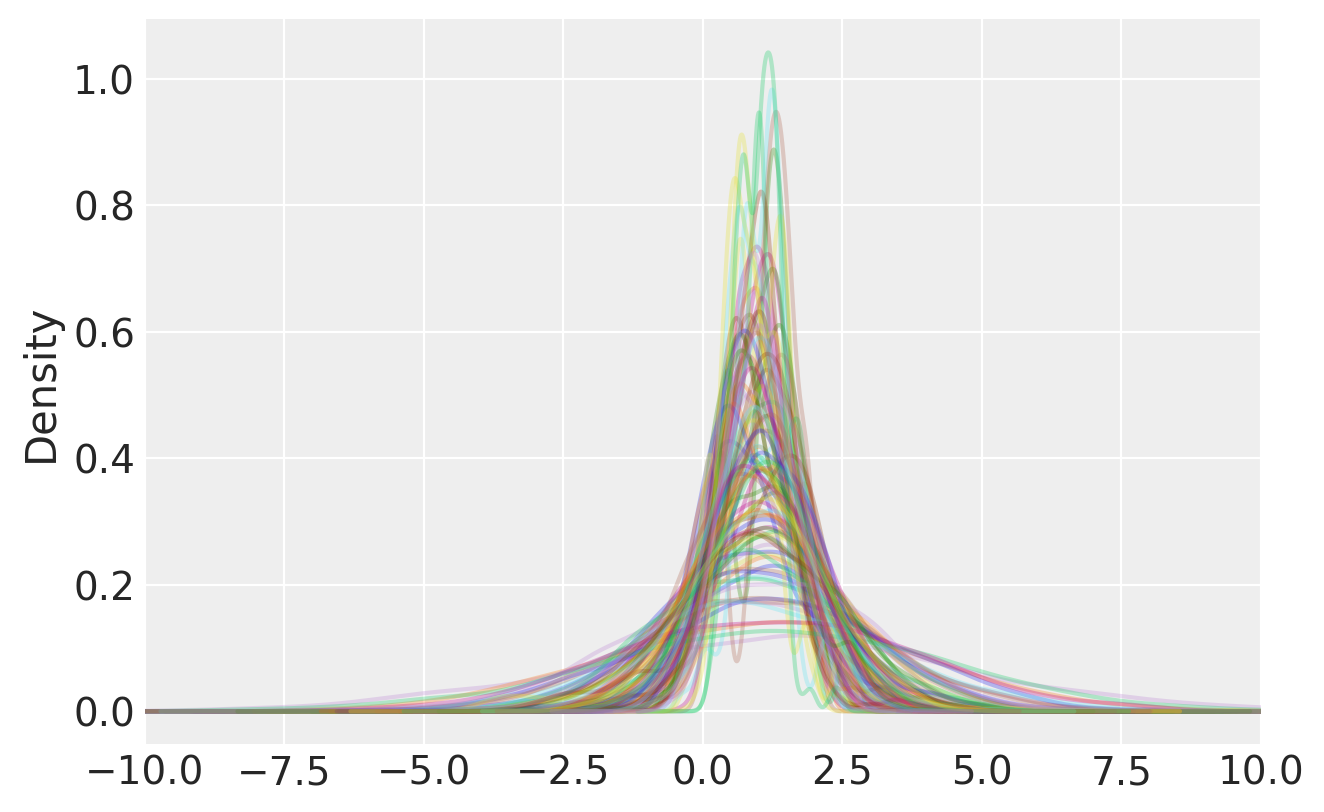

In [35]:
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

dv_model_df.filter(regex = 'y_hat').T.iloc[:, :100].plot.kde(alpha=0.3,
                                                        legend = False, 
                                                        xlim = (-10, 10));

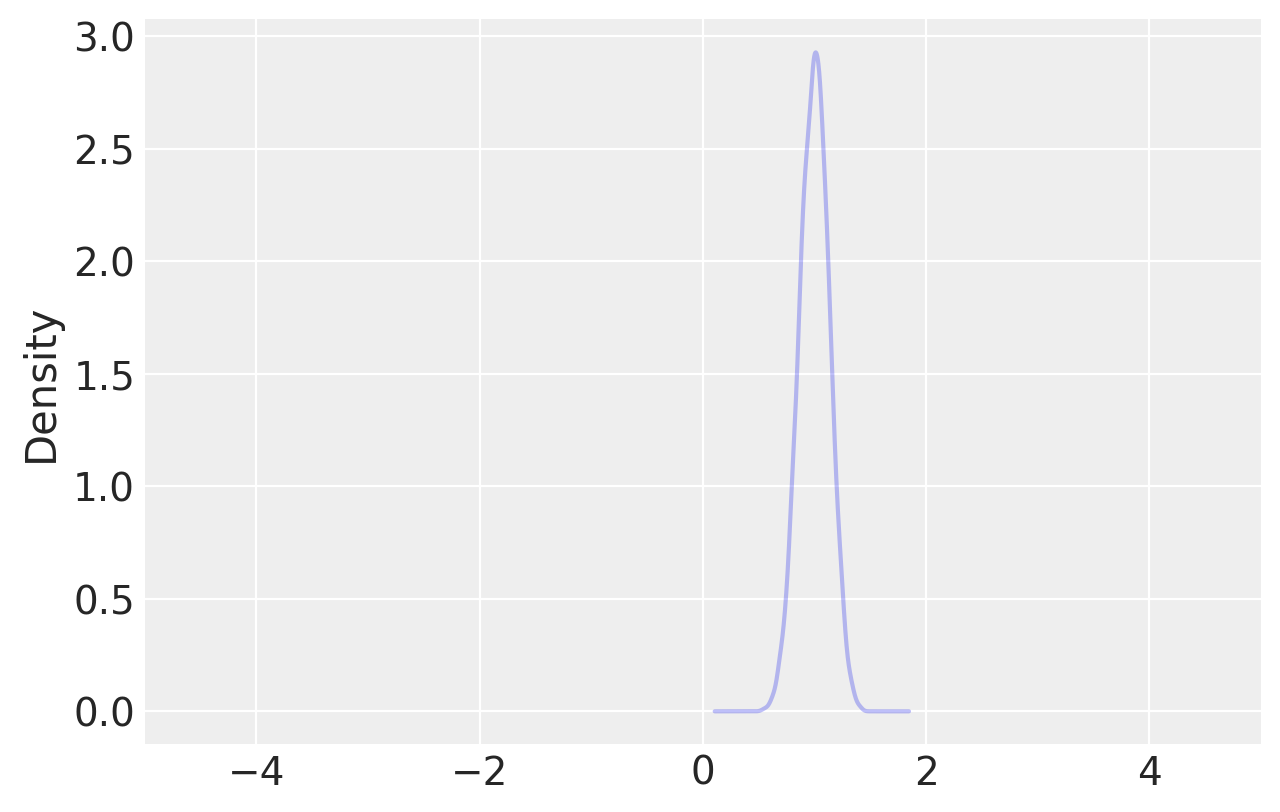

In [36]:
dv_model_df.filter(regex = 'y_hat').T.mean(axis = 0).plot.kde(alpha=0.3,
                                                        legend = False, 
                                                        xlim = (-5, 5));

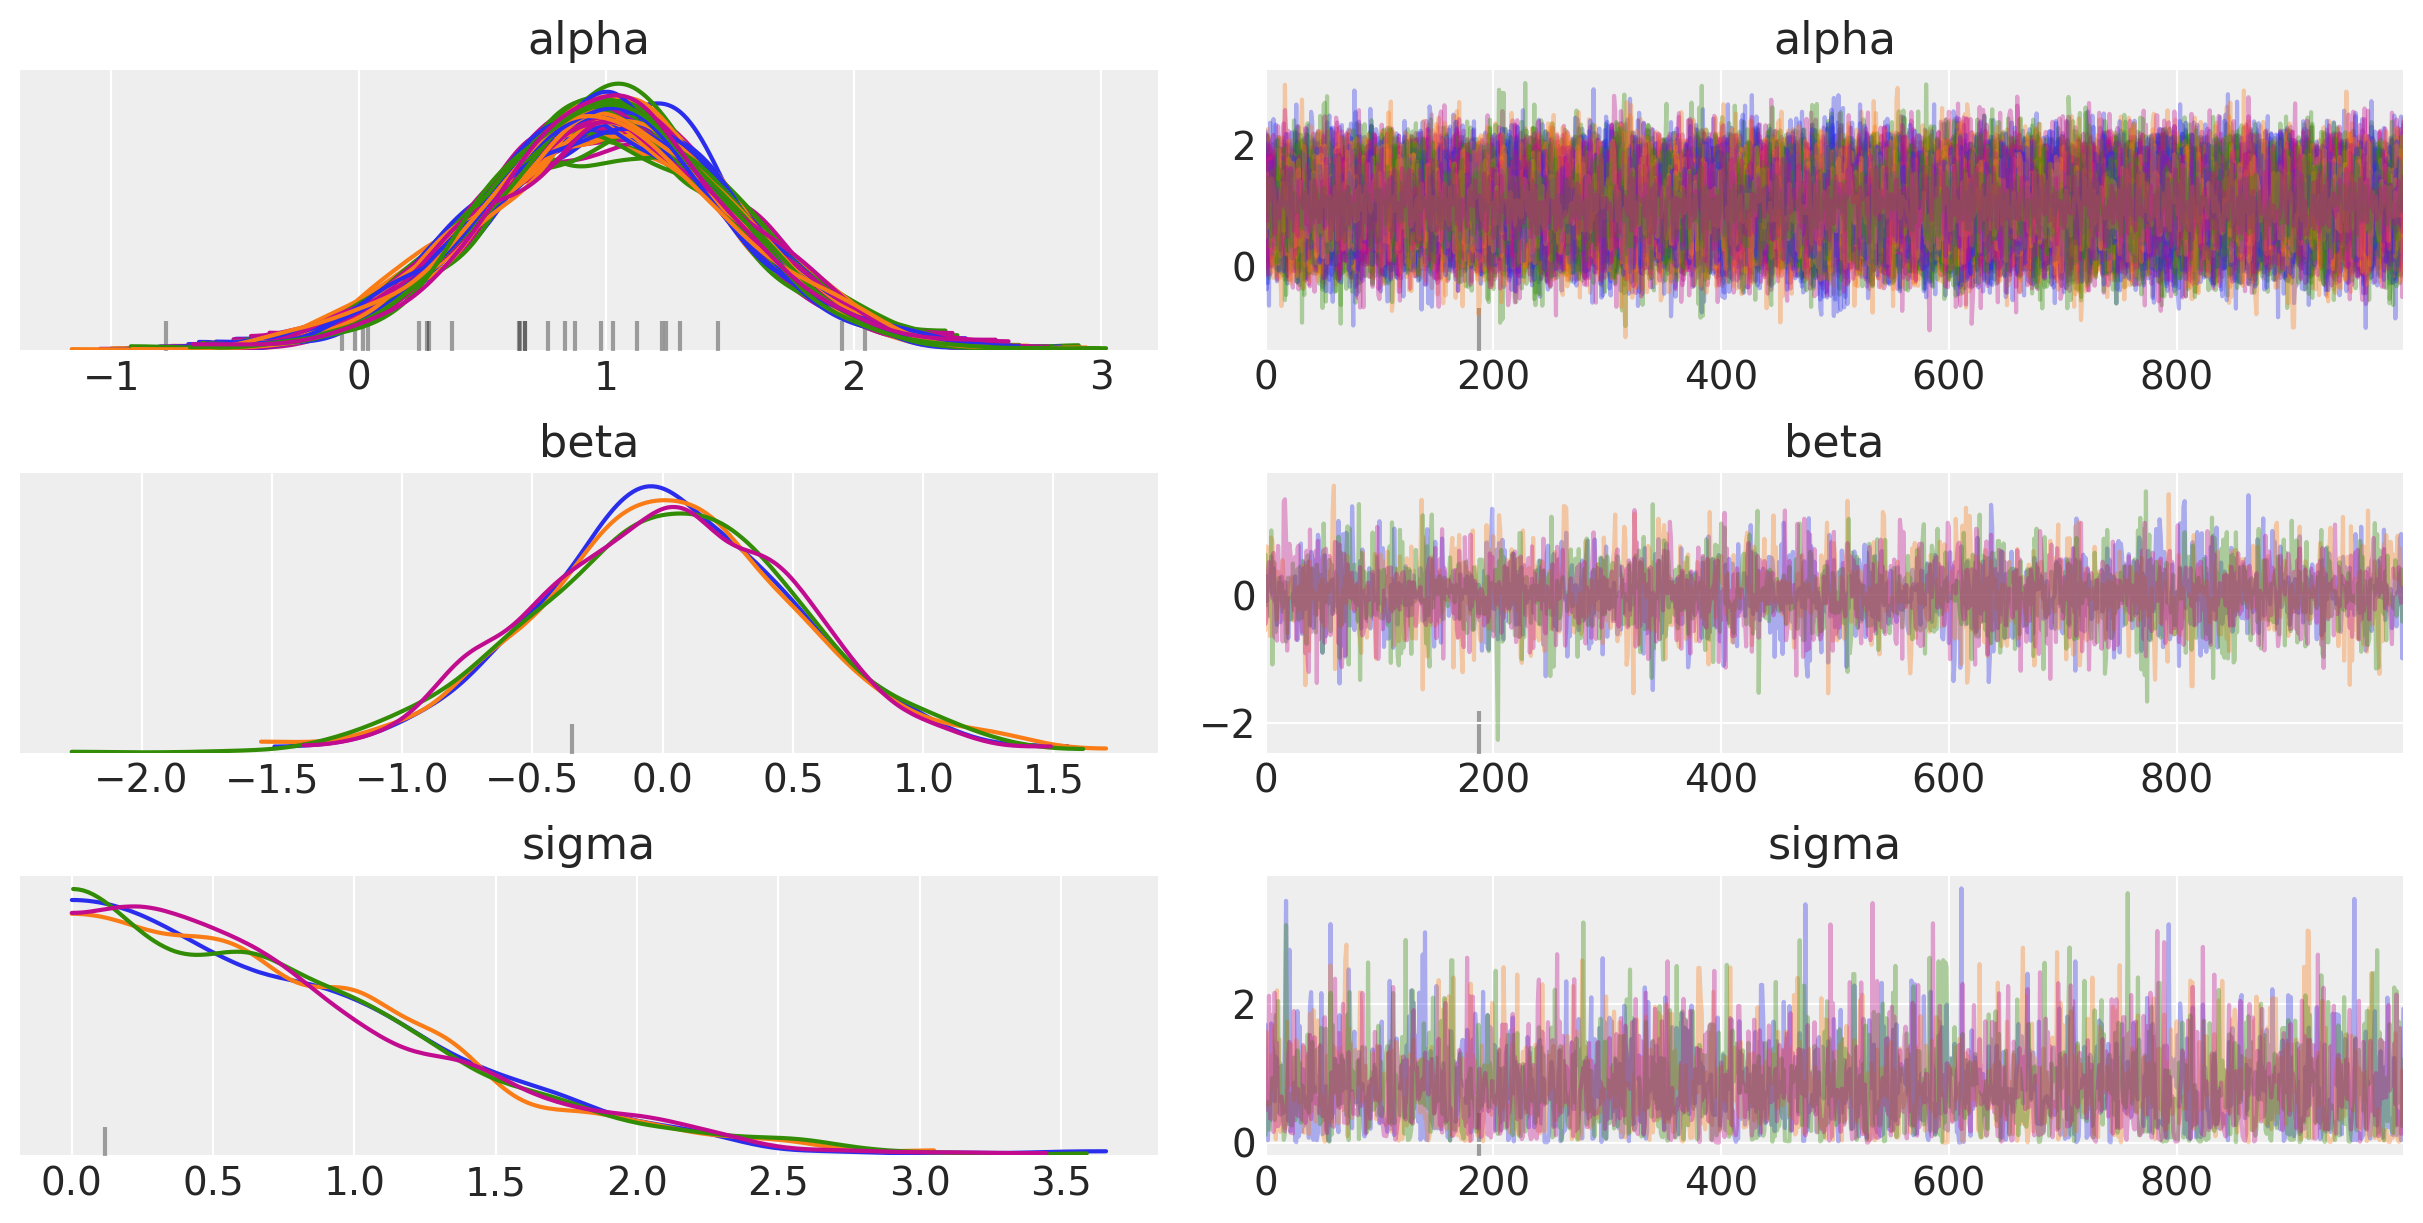

In [39]:
az.plot_trace(fit_dv_model, var_names=["alpha", "beta", "sigma"], compact = True);

In [ ]:
## Prior Predictive Checks

In [ ]:
## Fit model on fake data and recapture known parameters (appendix?)

In [ ]:
## Fit model on real data

In [ ]:
## Posterior predictive checks